# Final Project

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.offline as py # Visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, classification_report
from scipy import stats
from scipy.stats import randint
from scipy.stats import shapiro, normaltest, spearmanr, anderson, norm
from statistics import mode

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Import Data
airline = pd.read_csv("airline_passenger_satisfaction.csv")

In [3]:
# Data overview

print ("Rows     : " ,airline.shape[0])
print ("Columns  : " ,airline.shape[1])
print ("\nFeatures : \n" ,airline.columns.tolist())
print ("\nMissing values :  ", airline.isnull().sum().values.sum())
print ("\nUnique values :  \n",airline.nunique())

# There are 393 null values

Rows     :  129880
Columns  :  24

Features : 
 ['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

Missing values :   393

Unique values :  
 ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival

# Data Wrangle

#### There are 393 total empty cells. All of them are on the Arrival Delay column

In [4]:
# Count Empty Cells

empty_cells_count_per_column = airline.isnull().sum()

# Total empty cells
total_empty_cells = airline.isnull().sum().sum()

# Print results
print(empty_cells_count_per_column)
print(f"Total empty cells: {total_empty_cells}")

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
# Remove null values
airline_cleaned = airline.dropna()

# Print the cleaned DataFrame
print(len(airline_cleaned)) # Total rows trimmed to 129487
airline_cleaned.info() # Double check all variables

129487
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking               

# EDA

#### Test for normal distribution Shapiro-Wilk

I put four continuous columns under the microscope using a statistical test called Shapiro-Wilk. The results weren't just numbers; they became the stars of some neat charts that helped me decode the story the data was telling. The bell curves on these plots acted like a spotlight, revealing how closely the data resembled a normal distribution. Meanwhile, the histograms painted a picture of how often different values popped up. I didn't stop there – I marked key points like the average, median, and mode with dashed lines, making it easier to see where the action was. All of this insight got neatly organized into a summary table, where I could quickly compare important numbers with how "normal" the data looked. Notably, I noticed some low p-values for Age, Flight Distance, Departure Delay, and Arrival Delay – a sign that these aspects don't quite play by the usual rules. It's like finding a hidden subplot! This approach isn't just about picking the right statistical tools; it's also about getting a feel for the nuances of what's happening in my project.

Shapiro-Wilk Test for Age - Statistics=0.9885, p-value=0.0000
Shapiro-Wilk Test for Flight Distance - Statistics=0.8642, p-value=0.0000
Shapiro-Wilk Test for Departure Delay - Statistics=0.4207, p-value=0.0000
Shapiro-Wilk Test for Arrival Delay - Statistics=0.4272, p-value=0.0000


C:\Users\jborq\AppData\Local\Temp\ipykernel_21040\3092935635.py:6: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129487.



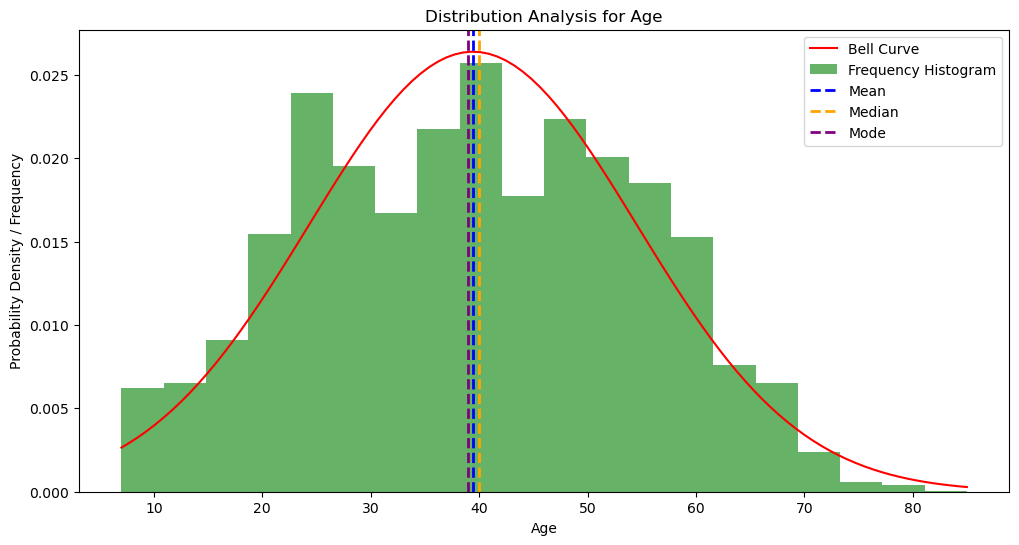

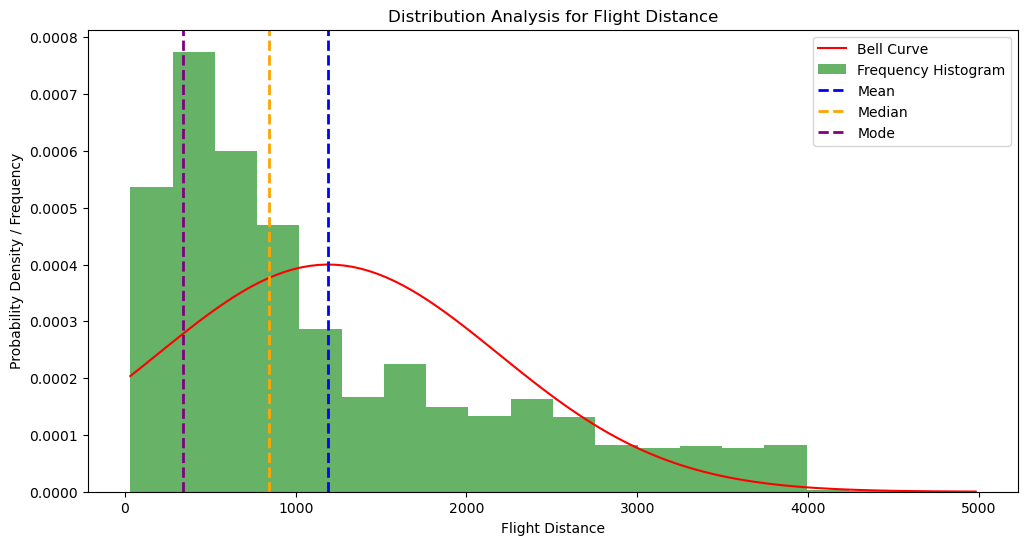

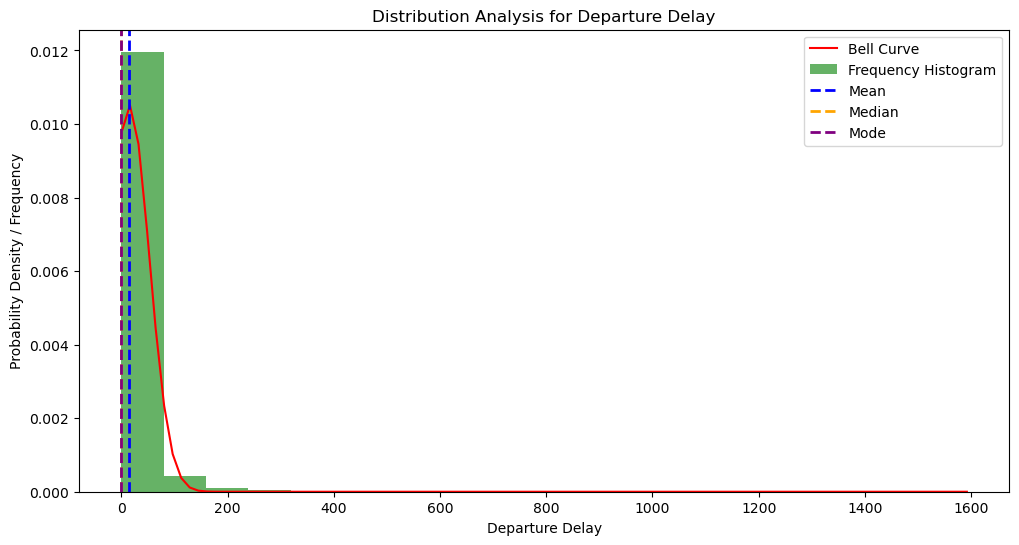

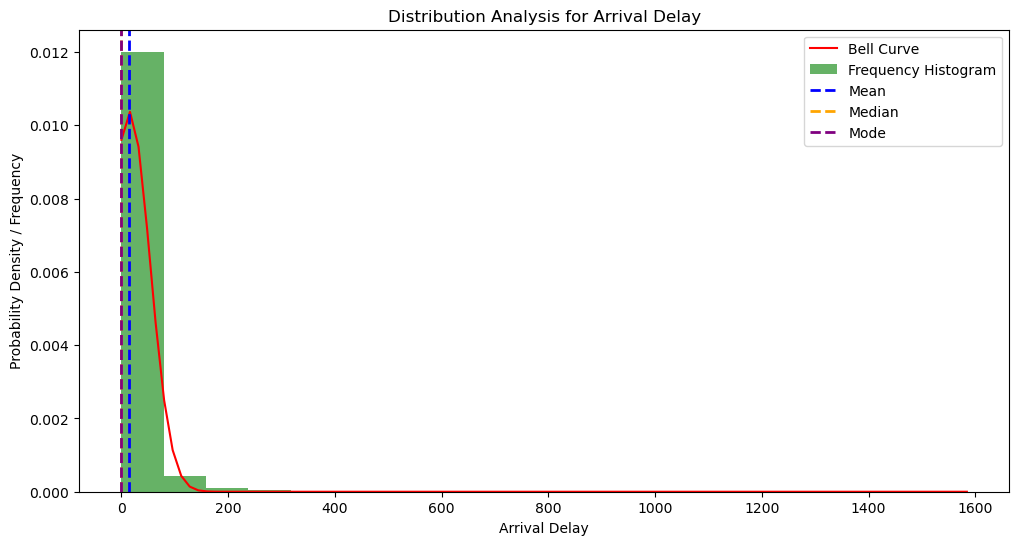

            Column     Statistics  p-value  Is Normal         Mean  Median  \
0              Age    7487.402865      0.0      False    39.428761    40.0   
1  Flight Distance   18126.218677      0.0      False  1190.210662   844.0   
2  Departure Delay  165376.680211      0.0      False    14.643385     0.0   
3    Arrival Delay  162490.924532      0.0      False    15.091129     0.0   

    Mode  
0   39.0  
1  337.0  
2    0.0  
3    0.0  


In [6]:
# Replace 'ColumnName' with the actual column name you want to test
selected_columns = ['Age' , 'Flight Distance', 'Departure Delay', 'Arrival Delay']
selected_data = airline_cleaned[selected_columns]

for column in selected_columns:
    stat, p_value = shapiro(selected_data[column])
    print(f'Shapiro-Wilk Test for {column} - Statistics={stat:.4f}, p-value={p_value:.4f}')
    
results = []

for column in selected_columns:
    data = selected_data[column]
    stat_nt, p_value_nt = normaltest(data)
    
    # Calculate mean, median, and mode
    mean_value = np.mean(data)
    median_value = np.median(data)
    mode_value = mode(data)

    plt.figure(figsize=(12, 6))
    
    # Plot the bell curve
    xmin, xmax = min(data), max(data)
    x = np.linspace(xmin, xmax, 100)
    fitted_curve = norm.pdf(x, mean_value, np.std(data))
    plt.plot(x, fitted_curve, 'r-', label='Bell Curve')
    
    # Plot the frequency histogram
    plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Frequency Histogram')
    
    # Add vertical lines for mean, median, and mode
    plt.axvline(mean_value, color='b', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_value, color='orange', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')

    plt.title(f'Distribution Analysis for {column}')
    plt.xlabel(column)
    plt.ylabel('Probability Density / Frequency')
    plt.legend()
    plt.show()
    
    results.append({
        'Column': column,
        'Statistics': stat_nt,
        'p-value': p_value_nt,
        'Is Normal': p_value_nt > 0.05,
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value
    })

# Create a DataFrame from the results
distribution_table = pd.DataFrame(results)

# Display the table
print(distribution_table)


#### Anderson-Darling Test

It's similar to the Shapiro-Wilk test but provides additional information about the nature of departures from normality. 

Based on the Anderson-Darling test, there is no strong evidence to suggest that these variables (Age, Flight Distance, Departure Delay, Arrival Delay) deviate significantly from a normal distribution. The p-values are high, indicating that the null hypothesis of normality is not rejected.

In [7]:
for column in selected_columns:
    result = anderson(selected_data[column])
    print(f'Anderson-Darling Test for {column} - Statistic={result.statistic:.4f}, p-value={result.critical_values[2]:.4f}')

Anderson-Darling Test for Age - Statistic=383.8265, p-value=0.7870
Anderson-Darling Test for Flight Distance - Statistic=6067.4384, p-value=0.7870
Anderson-Darling Test for Departure Delay - Statistic=24136.9408, p-value=0.7870
Anderson-Darling Test for Arrival Delay - Statistic=23722.4846, p-value=0.7870


#### Spearman correlation

The Spearman correlation matrix suggests that most of the pairwise relationships between these variables are very weak or close to zero. The only notable correlation is between Departure Delay and Arrival Delay, where a strong positive monotonic relationship is observed. Keep in mind that Spearman correlation measures monotonic relationships, not necessarily linear relationships.

In [8]:
spearman_corr_matrix = selected_data.corr(method='spearman')

# Print Spearman correlation matrix
print("Spearman Correlation Matrix:")
print(spearman_corr_matrix)

Spearman Correlation Matrix:
                      Age  Flight Distance  Departure Delay  Arrival Delay
Age              1.000000         0.073117        -0.009236      -0.010942
Flight Distance  0.073117         1.000000         0.025063      -0.001650
Departure Delay -0.009236         0.025063         1.000000       0.740284
Arrival Delay   -0.010942        -0.001650         0.740284       1.000000


Create new dataframe for visuals

In [9]:
# Specify the columns you want to keep
selected_columns = ['ID','Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [10]:
# Create a new DataFrame with only the selected columns
new_dataset = airline_cleaned[selected_columns].copy()
# Display the new dataset
print(new_dataset)

            ID  Gender Customer Type Type of Travel         Class  \
0            1    Male    First-time       Business      Business   
1            2  Female     Returning       Business      Business   
2            3    Male     Returning       Business      Business   
3            4    Male     Returning       Business      Business   
4            5  Female     Returning       Business      Business   
...        ...     ...           ...            ...           ...   
129875  129876    Male     Returning       Personal  Economy Plus   
129876  129877    Male     Returning       Personal  Economy Plus   
129877  129878    Male     Returning       Personal  Economy Plus   
129878  129879    Male     Returning       Personal  Economy Plus   
129879  129880  Female     Returning       Personal  Economy Plus   

                   Satisfaction  
0       Neutral or Dissatisfied  
1                     Satisfied  
2                     Satisfied  
3                     Satisfied  
4

In [11]:
#Separating satisfied and non satisfies customers
satisfied     = new_dataset[new_dataset["Satisfaction"] == "Satisfied"]
not_satisfied = new_dataset[new_dataset["Satisfaction"] == "Neutral or Dissatisfied"]

#Separating catagorical and numerical columns
Id_col     = ['ID']
target_col = ["Satisfaction"]
cat_cols   = new_dataset.nunique()[new_dataset.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in new_dataset.columns if x not in cat_cols + target_col + Id_col]

#### Visualize the percentage of people that are satisfied versus those that are not

In [12]:
# Satisfied distribution
print(new_dataset.groupby('Satisfaction').size())
print(new_dataset['Satisfaction'].value_counts(normalize=True) * 100)

# Satisfied Distribution viz

# Labels
lab = new_dataset["Satisfaction"].value_counts().keys().tolist()
# Values
val = new_dataset["Satisfaction"].value_counts().values.tolist()

trace = go.Pie(labels=lab,
               values=val,
               marker=dict(colors=['red', 'green'],
                           line=dict(color="white",
                                     width=1.3)
                           ),
               rotation=90,
               hoverinfo="label+value+text",
               hole=0.7  # Adjust hole size here
              )
layout = go.Layout(dict(title="Total Customer Satisfaction",
                        plot_bgcolor="rgb(243,243,243)",
                        paper_bgcolor="rgb(243,243,243)",
                        width=600,  # Adjust width here
                        height=400  # Adjust height here
                       )
                  )

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Dissatisfied customers are 13% higher than satisfied customers

Satisfaction
Neutral or Dissatisfied    73225
Satisfied                  56262
dtype: int64
Neutral or Dissatisfied    56.550078
Satisfied                  43.449922
Name: Satisfaction, dtype: float64


#### Visualize the percentage by gender that are satisfied versus those that are not

In [13]:
# Satisfied distribution by gender
satisfaction_by_gender = new_dataset.groupby(['Gender', 'Satisfaction']).size().unstack()

# Satisfied Distribution viz
lab = satisfaction_by_gender.columns
val_male = satisfaction_by_gender.loc['Male'].fillna(0).values
val_female = satisfaction_by_gender.loc['Female'].fillna(0).values

fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

trace_male = go.Pie(labels=lab,
                    values=val_male,
                    marker=dict(colors=['red', 'green'],
                                line=dict(color="white", width=1.3)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole=0.7,  # Adjust hole size here
                    name='Male')

trace_female = go.Pie(labels=lab,
                      values=val_female,
                      marker=dict(colors=['red', 'green'],
                                  line=dict(color="white", width=1.3)),
                      rotation=90,
                      hoverinfo="label+value+text",
                      hole=0.7,  # Adjust hole size here
                      name='Female')

fig.add_trace(trace_male, 1, 1)
fig.add_trace(trace_female, 1, 2)

fig.update_layout(title_text="Customer Satisfaction by Gender",
                  grid=dict(rows=1, columns=2),
                  plot_bgcolor="rgb(243,243,243)",
                  paper_bgcolor="rgb(243,243,243)",
                  width=600,  # Adjust width here
                  height=400  # Adjust height here
                 )

fig.update_layout(annotations=[
                      dict(text='Male', x=0.15, y=0.5, font_size=12, showarrow=False),
                      dict(text='Female', x=0.85, y=0.5, font_size=12, showarrow=False)
                  ])

py.iplot(fig)

In [14]:
def plot_pie(column, donut_size=0.7, plot_width=600, plot_height=400):  # Adjust plot_width and plot_height as desired
    
    trace1 = go.Pie(values  = satisfied[column].value_counts().values.tolist(),
                    labels  = satisfied[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Satisfied Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = donut_size  # Adjust the hole size here
                   )
    trace2 = go.Pie(values  = not_satisfied[column].value_counts().values.tolist(),
                    labels  = not_satisfied[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = donut_size,  # Adjust the hole size here
                    name    = "Non Satisfied Customers" 
                   )

    layout = go.Layout(dict(title = column + " Distribution in Customer Satisfaction",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Satisfied Customers",
                                                font = dict(size = 10),
                                                showarrow = False,
                                                x = .10, y = .5),
                                           dict(text = "Non Satisfied Customers",
                                                font = dict(size = 10),
                                                showarrow = False,
                                                x = .94,y = .5
                                               )
                                          ],
                            width = plot_width,  # Adjust plot width here
                            height = plot_height  # Adjust plot height here
                           )
                      )
    data = [trace1, trace2]
    fig  = go.Figure(data = data, layout = layout)
    py.iplot(fig)
    
    #for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)


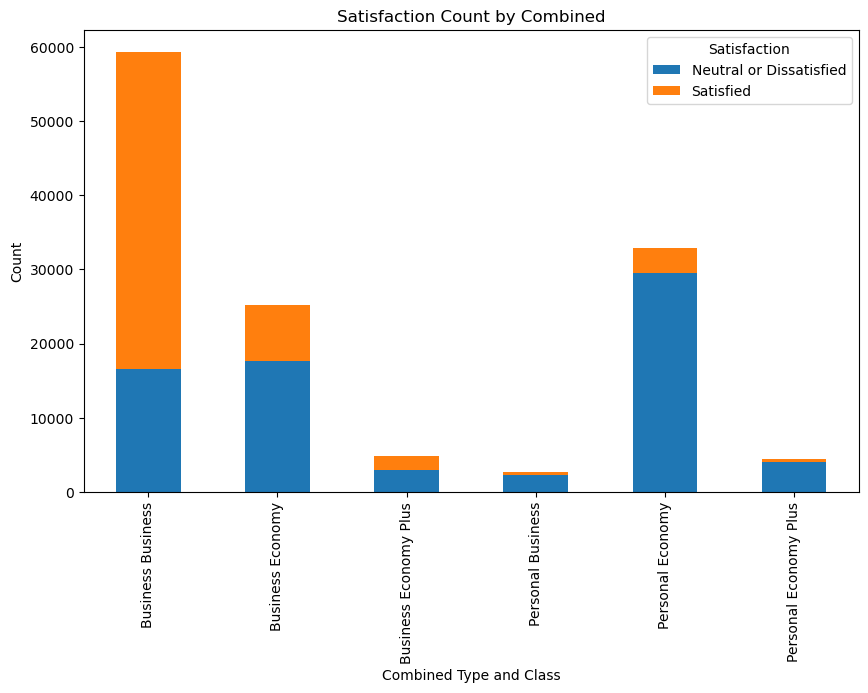

In [15]:
# Analyze dissatisfaction rates combining the type of travel and class

# Create a new column 'Combined Type and Class'
airline_cleaned.loc[:,'Combined Type and Class'] = airline_cleaned['Type of Travel'] + ' ' + airline_cleaned['Class']

# Display the DataFrame with the new column
# print(airline_cleaned[['Type of Travel', 'Class', 'Combined Type and Class']])

# Plot satisfaction by type of travel and class
satisfaction_type_combined = airline_cleaned.groupby(['Combined Type and Class', 'Satisfaction']).size().unstack()

# Plot the bar chart
satisfaction_type_combined.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Combined Type and Class')
plt.ylabel('Count')
plt.title('Satisfaction Count by Combined')

# Display the legend
plt.legend(title='Satisfaction')

# Show the plot
plt.show()

# The best grades are in the business type and class bucket. 

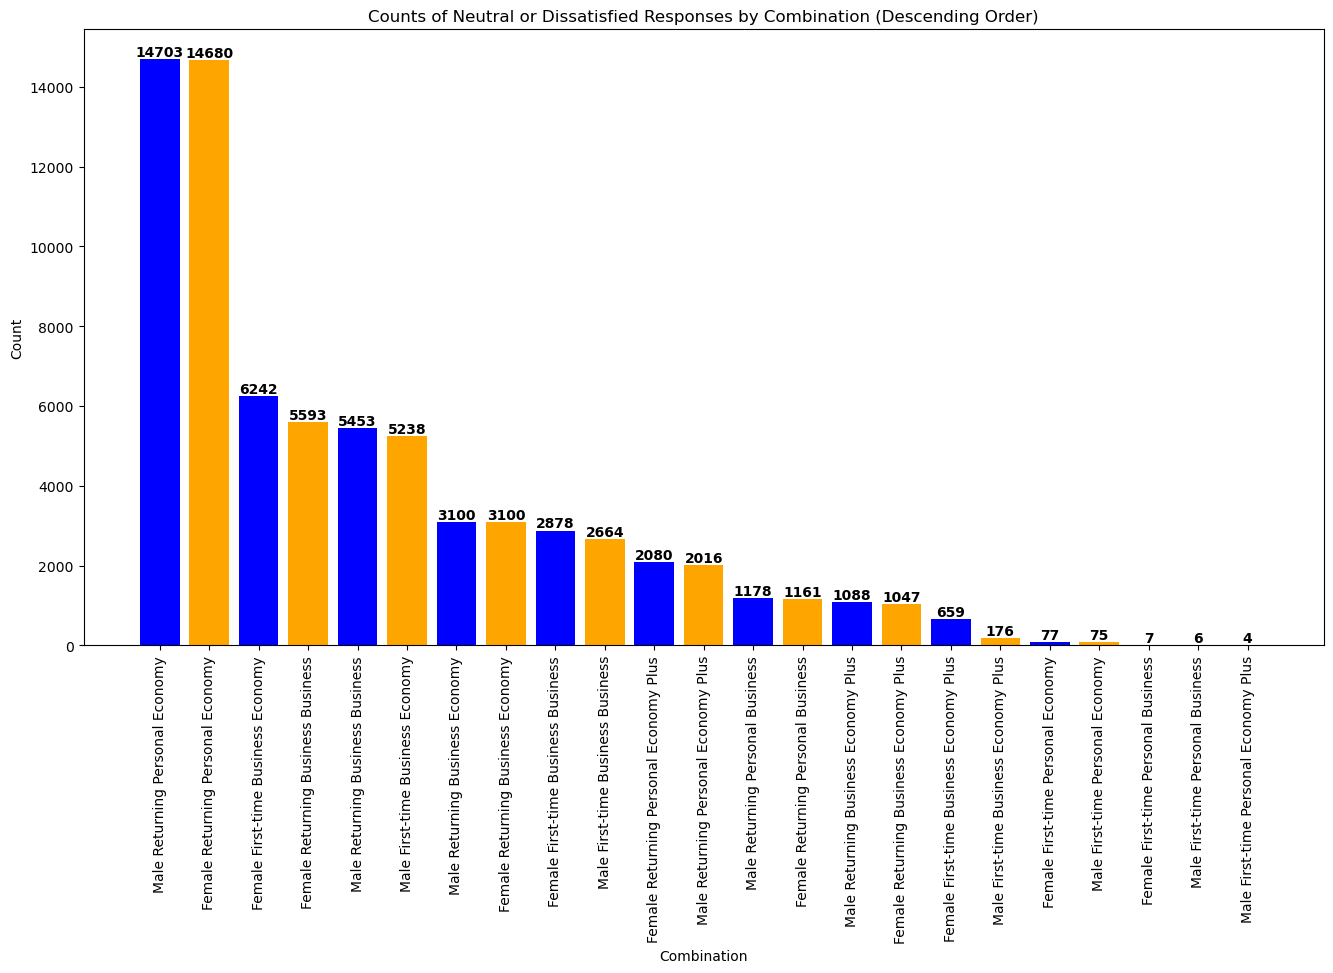

In [16]:
# Highest datisfaction group

satisfaction_counts = pd.crosstab(
    airline_cleaned['Satisfaction'],
    [airline_cleaned['Gender'], airline_cleaned['Customer Type'], airline_cleaned['Type of Travel'], airline_cleaned['Class']]
)

# Extract the count for the 'Satisfied' category for each combination
satisfied_counts_by_combination = satisfaction_counts.loc['Neutral or Dissatisfied']

# Sort combinations based on counts in descending order
sorted_combinations = satisfied_counts_by_combination.sort_values(ascending=False)

# Convert MultiIndex to a string for x-values
x_values = sorted_combinations.index.map(lambda x: ' '.join(map(str, x)))

# Define alternating colors
colors = ['blue', 'orange']  # Add more colors as needed

# Plot the descending bar chart with alternating colors
plt.figure(figsize=(16, 8))
bars = plt.bar(x_values, sorted_combinations, color=colors * (len(sorted_combinations) // len(colors) + 1))  # Repeat the colors to cover all bars

# Annotate each bar with its count value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', weight='bold')

plt.title('Counts of Neutral or Dissatisfied Responses by Combination (Descending Order)')
plt.xlabel('Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
# Dissatisfaction results mostly affects returning customers on a personal trip in economy class

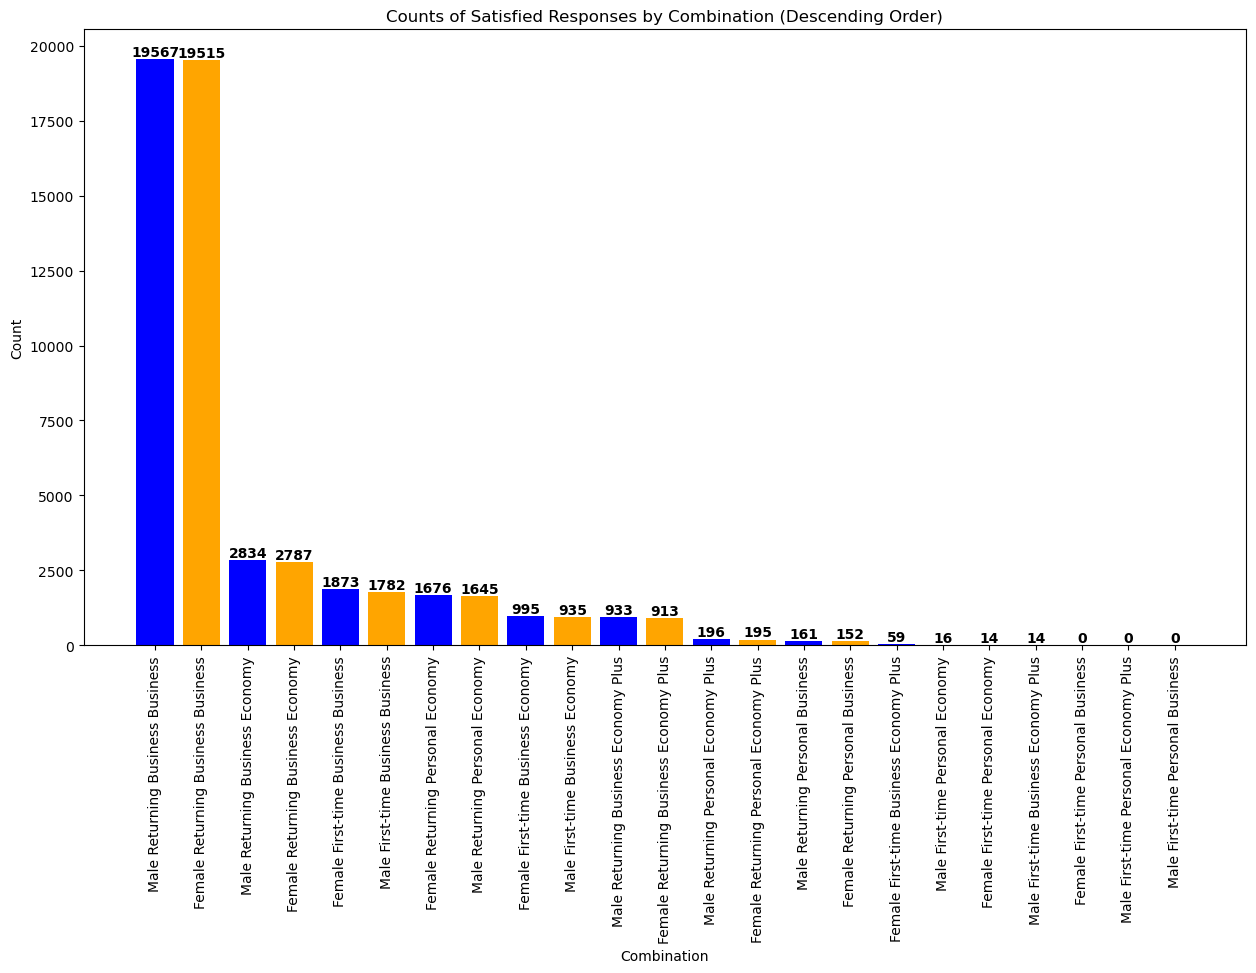

In [17]:
# Plot the satisfied combination and value
satisfaction_counts = pd.crosstab(
    airline_cleaned['Satisfaction'],
    [airline_cleaned['Gender'], airline_cleaned['Customer Type'], airline_cleaned['Type of Travel'], airline_cleaned['Class']]
)

# Extract the count for the 'Satisfied' category for each combination
satisfied_counts_by_combination = satisfaction_counts.loc['Satisfied']

# Sort combinations based on counts in descending order
sorted_combinations = satisfied_counts_by_combination.sort_values(ascending=False)

# Convert MultiIndex to a string for x-values
x_values = sorted_combinations.index.map(lambda x: ' '.join(map(str, x)))

# Define alternating colors
colors = ['blue', 'orange']  # Add more colors as needed

# Plot the descending bar chart with alternating colors
plt.figure(figsize=(15, 8))
bars = plt.bar(x_values, sorted_combinations, color=colors * (len(sorted_combinations) // len(colors) + 1))  # Repeat the colors to cover all bars

# Annotate each bar with its count value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', weight='bold')

plt.title('Counts of Satisfied Responses by Combination (Descending Order)')
plt.xlabel('Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Satisfaction results are highest on returning customers on a business trip flying in business class.

# Correlation Matrix

##### Prepare data for correlation matrix

In [18]:
print ("\nFeatures : \n" ,airline_cleaned.columns.tolist())


Features : 
 ['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Combined Type and Class']


In [19]:
# Prepare data for Correlation Matrix
# Copy dataset for transformation
airline_cleaned1 = airline_cleaned

## Transform Data

In [20]:
def process_data(airline_cleaned1):
    # Drop columns
    airline_cleaned1 = airline_cleaned1.drop(['ID', 'Combined Type and Class'], axis=1)

    # Mapping for categorical columns
    mappings = {
        'Gender': {'Male': 1, 'Female': 0},
        'Customer Type': {'Returning': 1, 'First-time': 0},
        'Type of Travel': {'Business': 1, 'Personal': 0},
        'Class': {'Business': 2, 'Economy Plus': 1, 'Economy': 0},
        'Satisfaction': {'Satisfied': 1, 'Neutral or Dissatisfied': 0}
    }

    # Apply mappings
    for column, mapping in mappings.items():
        airline_cleaned1[column] = airline_cleaned1[column].map(mapping).fillna(-1)

    return airline_cleaned1


In [21]:
airline_cleaned1 = process_data(airline_cleaned1)

In [22]:
# Calculate the correlation matrix for the training set
corr = airline_cleaned1.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

The variables most correlated are arrival and departure delay, in-flight Wifi Service and Ease of Online Booking, seat comfort and cleanliness, food and drink and cleanliness, in-flight entertainment and cleanliness, in-flight service and baggage handling.

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu", center=0,
            square=True, linewidths=.5)

<Axes: >

# Machine Learning Algorithms

##### Separate into training and testing data

In [24]:
# Features (X) are all columns except 'satisfaction'
# Target variable (y) is 'satisfaction'
X = airline_cleaned1.drop('Satisfaction', axis=1)
y = airline_cleaned1['Satisfaction']

In [25]:
# Split the data into training and testing sets
# The test_size parameter determines the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train are my training features and labels
# X_test and y_test are my testing features and labels

## Logistics Regression

In [26]:
# Create and fit the logistic regression model
# I have to scale the data because iterations reached its limit

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Set feature_names_in_ attribute
# Added for the ROC-AUC score
# model.feature_names_in_ = list(X_train.columns)

In [28]:
# Get the coefficients
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model.coef_[0]
})

In [29]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [30]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)

In [31]:
# Feature selection using Recursive Feature Elimination (RFE)
selector = RFE(model, n_features_to_select=1)
selector = selector.fit(X_train_scaled, y_train)

In [32]:
# Get the ranking of features
feature_ranking = pd.DataFrame({
    'Variable': X_train.columns,
    'Ranking': selector.ranking_
})

In [33]:
# Print the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("Regression Coefficients:")
print(coefficients)
print("\nFeature Ranking:")
print(feature_ranking)


Confusion Matrix:
[[13221  1464]
 [ 1865  9348]]
Regression Coefficients:
                                  Variable  Coefficient
0                                   Gender     0.037790
1                                      Age    -0.131344
2                            Customer Type     0.775500
3                           Type of Travel     1.284137
4                                    Class     0.338498
5                          Flight Distance    -0.006539
6                          Departure Delay     0.135867
7                            Arrival Delay    -0.336085
8   Departure and Arrival Time Convenience    -0.197437
9                   Ease of Online Booking    -0.229827
10                        Check-in Service     0.420927
11                         Online Boarding     0.840928
12                           Gate Location     0.033297
13                        On-board Service     0.387259
14                            Seat Comfort     0.076355
15                        Leg

Regression Coefficients:
The coefficients represent the impact of each independent variable on the log-odds of the dependent variable.
Here are a few observations:

Positive Coefficients (Increase in the odds):

Customer Type: 0.7755
Type of Travel: 1.2841
Check-in Service: 0.4209
Online Boarding: 0.8409
...
Negative Coefficients (Decrease in the odds):

Age: -0.1313
Flight Distance: -0.0065
Ease of Online Booking: -0.2298
In-flight Wifi Service: 0.5299
...
These coefficients indicate the direction and strength of the relationship between each independent variable and the log-odds of the dependent variables.

Confusion Matrix:
True Positive (TP): 9348
True Negative (TN): 13221
False Positive (FP): 1464
False Negative (FN): 1865

Feature Ranking:
The feature ranking indicates the importance of each feature in the model based on Recursive Feature Elimination (RFE). The lower the ranking, the more important the feature. For example, Online Boarding has the ranking of 1, indicating it's considered the most important feature.

In [34]:
# Training set predictions
train_predictions = model.predict(X_train_scaled)

# Testing set predictions
test_predictions = model.predict(X_test_scaled)

# Evaluate training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

# Evaluate testing set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

# Display the results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Metrics:
Accuracy: 0.8745
Precision: 0.8699
Recall: 0.8365
F1 Score: 0.8529

Testing Metrics:
Accuracy: 0.8715
Precision: 0.8646
Recall: 0.8337
F1 Score: 0.8489


The model seems to perform consistently well on both the training and testing sets, with similar metrics for accuracy, precision, recall, and F1 score. This suggests that the model is generalizing well to unseen data and is not overfitting to the training set. The precision and recall values indicate a good balance between correctly identifying positive instances and avoiding false positives.

## Decision Tree Classifier

In [35]:
# Create and fit the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Make predictions on the training set
train_predictions_dt = dt_model.predict(X_train)

In [37]:
# Make predictions on the testing set
test_predictions_dt = dt_model.predict(X_test)

In [38]:
# Evaluate training set
train_accuracy_dt = dt_model.score(X_train, y_train)
train_conf_matrix_dt = confusion_matrix(y_train, train_predictions_dt)
train_classification_report_dt = classification_report(y_train, train_predictions_dt)

In [39]:
# Evaluate testing set
test_accuracy_dt = dt_model.score(X_test, y_test)
test_conf_matrix_dt = confusion_matrix(y_test, test_predictions_dt)
test_classification_report_dt = classification_report(y_test, test_predictions_dt)

In [40]:
# Display training the results
print("Decision Tree Training Metrics:")
print(f"Accuracy: {train_accuracy_dt:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix_dt)
print("Classification Report:")
print(train_classification_report_dt)

Decision Tree Training Metrics:
Accuracy: 1.0000
Confusion Matrix:
[[58540     0]
 [    0 45049]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58540
           1       1.00      1.00      1.00     45049

    accuracy                           1.00    103589
   macro avg       1.00      1.00      1.00    103589
weighted avg       1.00      1.00      1.00    103589



In [41]:
# Display testing results
print("\nDecision Tree Testing Metrics:")
print(f"Accuracy: {test_accuracy_dt:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix_dt)
print("Classification Report:")
print(test_classification_report_dt)


Decision Tree Testing Metrics:
Accuracy: 0.9456
Confusion Matrix:
[[13929   756]
 [  653 10560]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14685
           1       0.93      0.94      0.94     11213

    accuracy                           0.95     25898
   macro avg       0.94      0.95      0.94     25898
weighted avg       0.95      0.95      0.95     25898



The training data displays some signs of overfitting, although the testig data performs very well. I will run some steps to figure out where overfitting occurs

In [42]:
from sklearn.model_selection import learning_curve

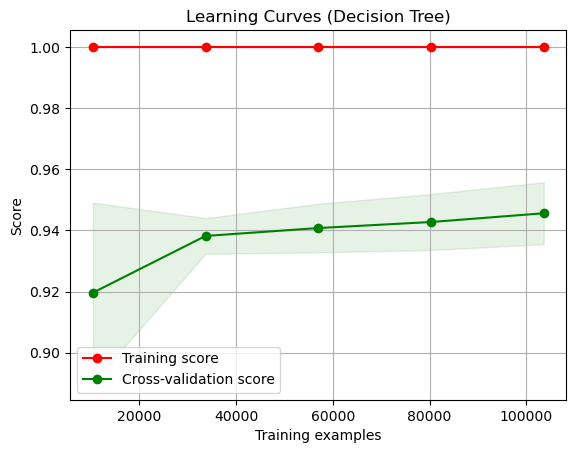

In [43]:
# Examine learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage:
title = "Learning Curves (Decision Tree)"
cv = 5  # Number of cross-validation folds
plot_learning_curve(dt_model, title, X, y, cv=cv)
plt.show()

In [44]:
# Cross validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)  # Change cv to the desired number of folds
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.9442428  0.92659665 0.94960806 0.95389427 0.9537012 ]


In [45]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the results
print("Feature Importance:")
print(feature_importances)

Feature Importance:
                                   Feature  Importance
11                         Online Boarding    0.362015
19                  In-flight Wifi Service    0.178451
3                           Type of Travel    0.148086
20                 In-flight Entertainment    0.046987
2                            Customer Type    0.040629
10                        Check-in Service    0.028574
5                          Flight Distance    0.026450
4                                    Class    0.021625
1                                      Age    0.020961
12                           Gate Location    0.020042
21                        Baggage Handling    0.017166
14                            Seat Comfort    0.015457
18                       In-flight Service    0.014301
16                             Cleanliness    0.009289
7                            Arrival Delay    0.009218
13                        On-board Service    0.008941
15                        Leg Room Service   

### Hyperparameter Tuning

##### Random Search

In [46]:
# Define the parameter distributions
param_dist = {
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create the Decision Tree model
dt_model1 = DecisionTreeClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(dt_model1, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_random = random_search.best_params_
best_dt_model_random = random_search.best_estimator_

# Print the best parameters
print("Best Parameters (Random Search):", best_params_random)

# Evaluate the best model on the testing set
best_model_predictions_random = best_dt_model_random.predict(X_test)
best_model_accuracy_random = accuracy_score(y_test, best_model_predictions_random)

print("Best Model Accuracy on Testing Set (Random Search):", best_model_accuracy_random)

Best Parameters (Random Search): {'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 13}
Best Model Accuracy on Testing Set (Random Search): 0.954050505830566


In [47]:
# Display hyperparameter results
test_accuracy_dt1 = random_search.score(X_test, y_test)

print("\nDecision Tree Random Search Results:")
print(f"Accuracy: {test_accuracy_dt1:.4f}")

# Confusion Matrix
conf_matrix_random = confusion_matrix(y_test, best_model_predictions_random)
print("Confusion Matrix (Random Search):")
print(conf_matrix_random)

# Classification Report
classification_report_random = classification_report(y_test, best_model_predictions_random)
print("\nClassification Report (Random Search):")
print(classification_report_random)


Decision Tree Random Search Results:
Accuracy: 0.9541
Confusion Matrix (Random Search):
[[14280   405]
 [  785 10428]]

Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14685
           1       0.96      0.93      0.95     11213

    accuracy                           0.95     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



In [48]:
# Feature Importance
feature_importance_random = best_dt_model_random.feature_importances_
feature_importance_dict = dict(zip(X_test.columns, feature_importance_random))


# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance
print("Feature Importance Ranking:")
for rank, (feature, importance) in enumerate(sorted_feature_importance, start=1):
    print(f"{rank}. {feature}: {importance:.4f}")

Feature Importance Ranking:
1. Online Boarding: 0.3998
2. In-flight Wifi Service: 0.1959
3. Type of Travel: 0.1639
4. In-flight Entertainment: 0.0501
5. Customer Type: 0.0443
6. Check-in Service: 0.0276
7. Class: 0.0223
8. Gate Location: 0.0158
9. Baggage Handling: 0.0139
10. In-flight Service: 0.0125
11. Seat Comfort: 0.0119
12. Age: 0.0084
13. Cleanliness: 0.0073
14. Flight Distance: 0.0072
15. On-board Service: 0.0052
16. Leg Room Service: 0.0037
17. Arrival Delay: 0.0036
18. Departure and Arrival Time Convenience: 0.0020
19. Departure Delay: 0.0018
20. Food and Drink: 0.0015
21. Ease of Online Booking: 0.0009
22. Gender: 0.0004


## Naive Bayes

In [49]:
# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing set
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, naive_bayes_predictions)
conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)
classification_report_nb = classification_report(y_test, naive_bayes_predictions)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_nb)

Accuracy: 0.8616
Confusion Matrix:
[[13121  1564]
 [ 2021  9192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14685
           1       0.85      0.82      0.84     11213

    accuracy                           0.86     25898
   macro avg       0.86      0.86      0.86     25898
weighted avg       0.86      0.86      0.86     25898



## Calculate the ROC-AUC score for each model

C:\Users\jborq\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



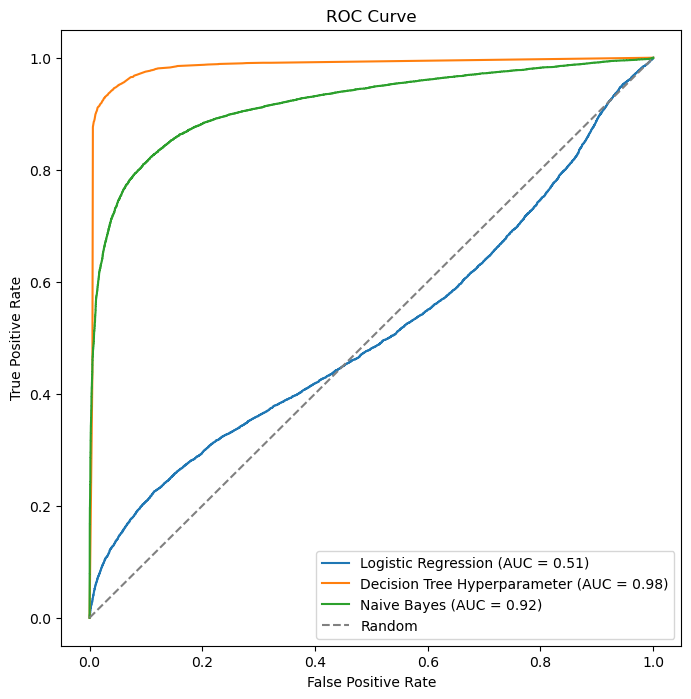

In [50]:
# Logistic Regression
logistic_regression_probs = model.predict_proba(X_test)[:, 1]
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_probs)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probs)

# Decision Tree Hyperparameter Tuning
decision_tree_probs = random_search.predict_proba(X_test)[:, 1]
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_probs)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)

# Naive Bayes
naive_bayes_probs = naive_bayes_model.predict_proba(X_test)[:, 1]
naive_bayes_roc_auc = roc_auc_score(y_test, naive_bayes_probs)
naive_bayes_fpr, naive_bayes_tpr, _ = roc_curve(y_test, naive_bayes_probs)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label=f'Logistic Regression (AUC = {logistic_regression_roc_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree Hyperparameter (AUC = {decision_tree_roc_auc:.2f})')
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label=f'Naive Bayes (AUC = {naive_bayes_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The results of the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) for three different models: Logistic Regression, Decision Tree Classifier, and Naive Bayes. The AUC-ROC is a metric used to evaluate the performance of binary classification models.

Here's the results:

1. **Logistic Regression (AUC=0.51):**
   - An AUC of 0.51 is very close to 0.5, which suggests that the logistic regression model is not performing well. An AUC of 0.5 indicates a model that performs no better than random chance.

2. **Decision Tree Hyperparameter (AUC=0.98):**
   - An AUC of 0.98 is excellent. It indicates that the decision tree classifier is very effective at distinguishing between the two classes. A high AUC implies that the model has a high true positive rate and a low false positive rate, leading to a strong separation between the positive and negative classes.

3. **Naive Bayes (AUC=0.92):**
   - An AUC of 0.92 is also quite good. It suggests that the Naive Bayes model is performing well in terms of classification. It has a strong ability to discriminate between the classes, although not as high as the decision tree classifier.